In [3]:
import rasterio as rio
import pandas as pd
import numpy as np
import fiona
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd
import os
import matplotlib.pyplot as plt

from autorift_utilities import rio_write

In [18]:
las_pts = pd.read_csv('/Users/jukesliu/Documents/TURNER/DATA/ICE_THICKNESS/surface/Lidar/Hubbard_Valerie_Turnerterminus_2009_238_las.csv')

In [ ]:
# pull DEM elevations
dem_path = '/Users/jukesliu/Documents/TURNER/DATA/ICE_THICKNESS/surface/final-DEMs/'
file = '20200605_UTM_OIBlidar.tif'

# open DEM
src = rio.open(dem_path+file); elev = src.read(1); affine=src.transform
grid_spacing = affine[0]
[ys,xs] = np.where(elev > -1000) # find indexes where there are values
ys = len(y_grid) - ys # flip y-indexes

# grab grid and loop through each grid cell (slow)
x_grid = np.arange(src.bounds.left, src.bounds.right+1, grid_spacing)
y_grid = np.arange(src.bounds.bottom, src.bounds.top+1, grid_spacing)

# add st. dev and mean into a raster with same size as the DEM
stdev = np.empty(elev.shape)
mean = np.empty(elev.shape)

x0 = x_grid[xs]
x1 = x_grid[xs+1]
y0 = y_grid[ys]
y1 = y_grid[ys+1]

print(x0)

# len(y_grid) - ys
for i in range(0, len(y_grid)-1):
    y0 = y_grid[i]
    y1 = y_grid[i+1]
    for j in range(0, len(x_grid)-1):
        x0 = x_grid[j]
        x1 = x_grid[j+1]
        
        # grab the lidar points within the grid cell
        grid_las = las_pts[(las_pts.x <= x1) & (las_pts.x >= x0) & (las_pts.y >= y0) & (las_pts.y <= y1)]
        
        if len(grid_las) > 0: # there are points in the cell
            mean[i,j] = np.nanmean(grid_las.z)
            stdev[i,j] = np.nanstd(grid_las.z)
        else: # empty cell, input Nans
            mean[i,j] = np.NaN
            stdev[i,j] = np.NaN
            
#         print(i,j, 'out of',elev.shape, '. Mean:', mean[i,j], '. Std:', stdev[i,j])
            
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
im1 = ax1.imshow(elev); fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(mean); fig.colorbar(im2, ax=ax2)
im3 = ax3.imshow(stdev); fig.colorbar(im3, ax=ax3)`
plt.show()

[559538.922 559592.922 559528.922 ... 580056.922 580056.922 580042.922]


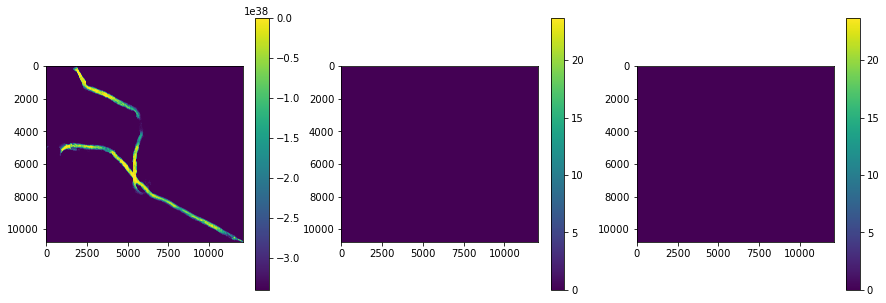

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
im1 = ax1.imshow(elev); fig.colorbar(im1, ax=ax1)
im2 = ax2.imshow(mean); fig.colorbar(im2, ax=ax2)
im3 = ax3.imshow(stdev); fig.colorbar(im3, ax=ax3)
plt.show()